In [1]:
import lightgbm as lgb
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from catboost import CatBoostClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

# VLAGUN_PHYS_YEARS3 - Mało przypadków i mało zmiennych

In [2]:
df = pd.read_csv('VLagun_Phys_Years3.csv')
X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values
results = {}

In [3]:
seed = 0
test_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
print('Shape of X_train:', X_train.shape)
print('Shape of X_test:', X_test.shape)

Shape of X_train: (84, 8)
Shape of X_test: (36, 8)


In [4]:
def confusion_mat(Y_pred, Y_test):
    plt.figure()
    sns.set(font_scale=1.5)
    cm = confusion_matrix(Y_pred, Y_test)
    sns.heatmap(cm, annot=True, fmt='g')
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()

### AdaBoost

Accuracy of the result is: 0.9444444444444444


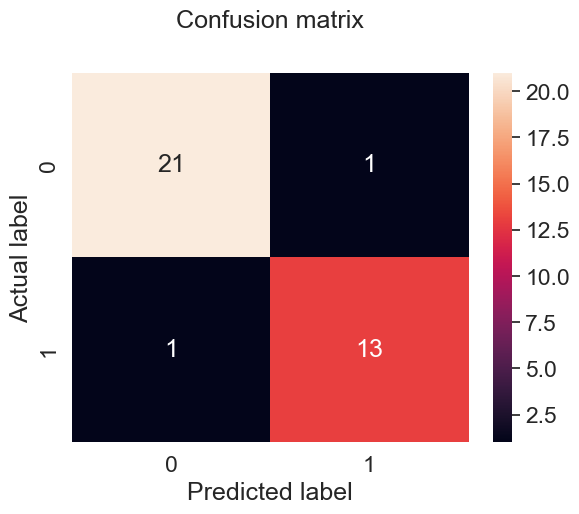

In [5]:
clf = AdaBoostClassifier(n_estimators=100, random_state=1)
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)
results['AdaBoost'] = np.mean(predicted == y_test)
print(f'Accuracy of the result is: {results["AdaBoost"]}')

confusion_mat(predicted, y_test)

### GBM

Accuracy of the result is: 0.8888888888888888


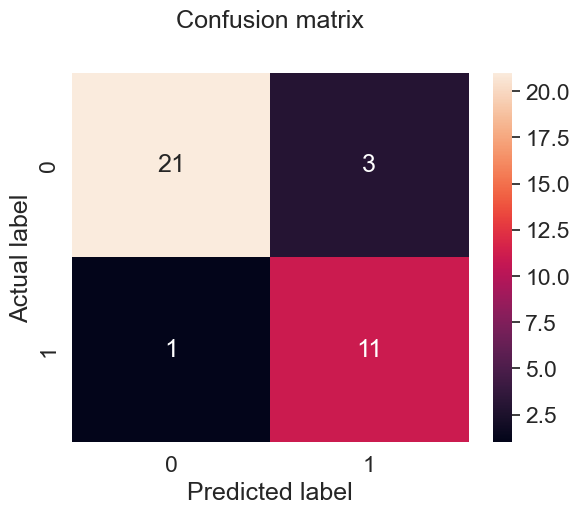

In [6]:
clf = GradientBoostingClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)
results['GBM'] = np.mean(predicted == y_test)
print(f'Accuracy of the result is: {results["GBM"]}')

confusion_mat(predicted, y_test)

### XGBoost

Accuracy of the result is: 0.9166666666666666


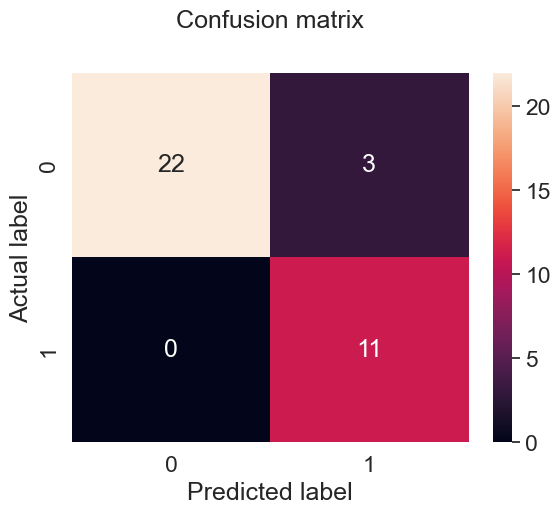

In [7]:
clf = XGBClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)
results['XGBoost'] = np.mean(predicted == y_test)
print(f'Accuracy of the result is: {results["XGBoost"]}')

confusion_mat(predicted, y_test)

### Light GMB

[LightGBM] [Info] Number of positive: 42, number of negative: 42
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000056 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 188
[LightGBM] [Info] Number of data points in the train set: 84, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

C:\Users\Arek\PycharmProjects\Machine-Learning\.venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


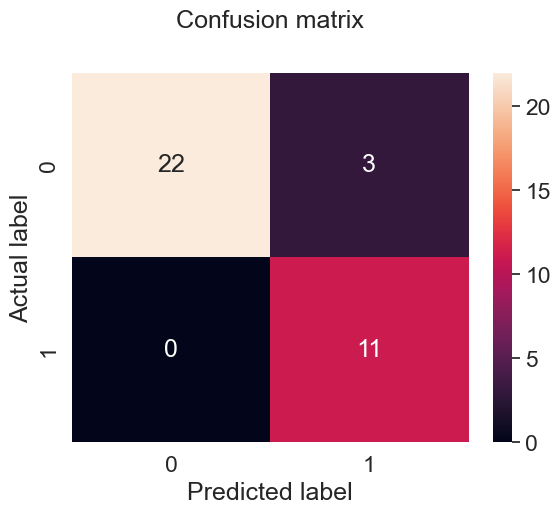

In [8]:
clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)
results['LightGMB'] = np.mean(predicted == y_test)
print(f'Accuracy of the result is: {results["LightGMB"]}')

confusion_mat(predicted, y_test)

### Cat Boost

Learning rate set to 0.029553
0:	learn: 0.6857845	total: 128ms	remaining: 12.7s
1:	learn: 0.6791976	total: 131ms	remaining: 6.4s
2:	learn: 0.6732351	total: 132ms	remaining: 4.28s
3:	learn: 0.6662502	total: 134ms	remaining: 3.22s
4:	learn: 0.6597836	total: 136ms	remaining: 2.58s
5:	learn: 0.6543730	total: 137ms	remaining: 2.15s
6:	learn: 0.6454713	total: 139ms	remaining: 1.84s
7:	learn: 0.6384664	total: 141ms	remaining: 1.62s
8:	learn: 0.6341624	total: 143ms	remaining: 1.44s
9:	learn: 0.6267518	total: 144ms	remaining: 1.3s
10:	learn: 0.6221214	total: 146ms	remaining: 1.18s
11:	learn: 0.6165347	total: 148ms	remaining: 1.08s
12:	learn: 0.6095540	total: 150ms	remaining: 1s
13:	learn: 0.6032727	total: 151ms	remaining: 929ms
14:	learn: 0.5970914	total: 153ms	remaining: 868ms
15:	learn: 0.5900335	total: 155ms	remaining: 814ms
16:	learn: 0.5851469	total: 157ms	remaining: 766ms
17:	learn: 0.5796333	total: 158ms	remaining: 722ms
18:	learn: 0.5749229	total: 160ms	remaining: 683ms
19:	learn: 0.568

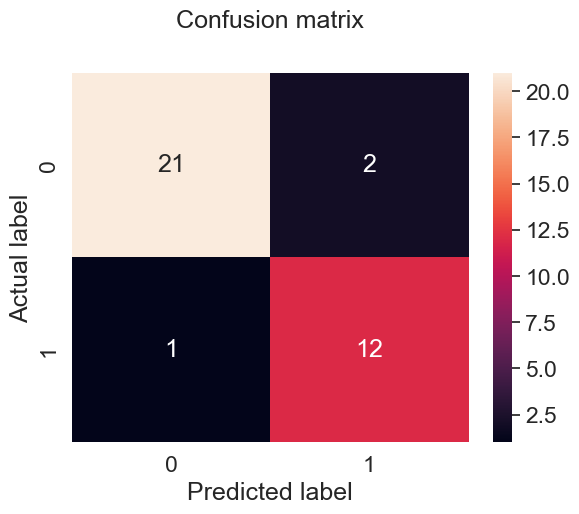

In [9]:
clf = CatBoostClassifier(iterations=100)
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)
results['CatBoost'] = np.mean(predicted == y_test)
print(f'Accuracy of the result is: {results["CatBoost"]}')

confusion_mat(predicted, y_test)

In [10]:
def make_table(results):
    df = pd.DataFrame.from_dict(results, orient='index', columns=['Accuracy'])
    df = df.round(3)
    df = df.transpose()
    fig, ax = plt.subplots(figsize=(8, 2))
    ax.axis('off')
    min_val = df.iloc[0].min()
    max_val = df.iloc[0].max()
    cell_colors = []
    for val in df.iloc[0]:
        if val == max_val:
            cell_colors.append('lightgreen')
        elif val == min_val:
            cell_colors.append('lightcoral')
        else:
            cell_colors.append('white')
    table = ax.table(cellText=df.values,
                     colLabels=df.columns,
                     rowLabels=df.index,
                     cellColours=[cell_colors],
                     loc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(12)
    table.scale(1, 2)
    plt.show()

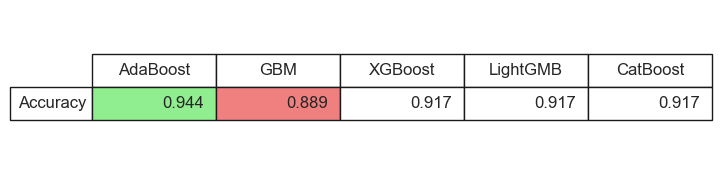

In [11]:
make_table(results)